In [1]:
#Manipulaçao e processamento de dados
import pandas as pd
import numpy as np


 #Visualização de dados

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE


#Pré-processamento e modelos de Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier




In [2]:
df = pd.read_csv('credit_data.csv')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

(1000, 21)
laufkont    int64
laufzeit    int64
moral       int64
verw        int64
hoehe       int64
sparkont    int64
beszeit     int64
rate        int64
famges      int64
buerge      int64
wohnzeit    int64
verm        int64
alter       int64
weitkred    int64
wohn        int64
bishkred    int64
beruf       int64
pers        int64
telef       int64
gastarb     int64
kredit      int64
dtype: object
laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
dtype: int64


In [4]:
# Frequência absoluta da variável alvo
print(df['kredit'].value_counts())

# Frequência relativa (porcentagem)
print(df['kredit'].value_counts(normalize=True) * 100)


kredit
1    700
0    300
Name: count, dtype: int64
kredit
1    70.0
0    30.0
Name: proportion, dtype: float64


In [5]:
df.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


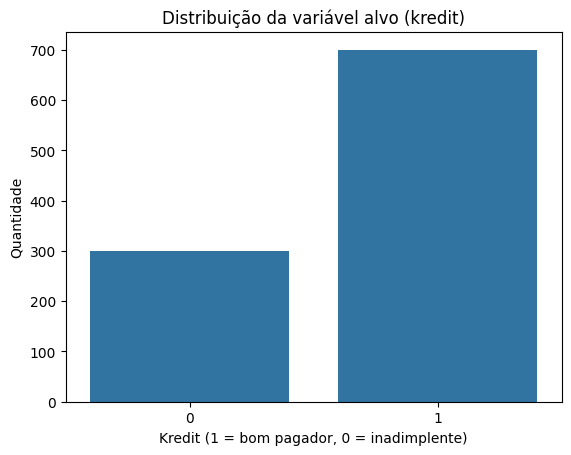

In [6]:
sns.countplot(x='kredit', data=df)
plt.title('Distribuição da variável alvo (kredit)')
plt.xlabel('Kredit (1 = bom pagador, 0 = inadimplente)')
plt.ylabel('Quantidade')
plt.show()


In [7]:
X = df.drop('kredit', axis=1)
y = df['kredit']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
# 5. Aplicação do SMOTE no treino
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [10]:
# Instancia e treina o modelo
modelo = RandomForestClassifier(class_weight='balanced', random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [11]:
# Faz previsões
y_pred = modelo.predict(X_test)


In [12]:
# Avaliação do modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 23  37]
 [ 11 129]]
              precision    recall  f1-score   support

           0       0.68      0.38      0.49        60
           1       0.78      0.92      0.84       140

    accuracy                           0.76       200
   macro avg       0.73      0.65      0.67       200
weighted avg       0.75      0.76      0.74       200

